# Lead Score - Case Study

## Problem Statement

X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals and Objectives

There are quite a few goals for this case study.

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1]:
## Importing all the necessary libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

#surpress warnings
import warnings 
warnings.filterwarnings('ignore')

# 1: Loading and Cleaning Data

### 1.1 Importing Data 

In [2]:
# Reading the data. 
df=pd.read_csv('Leads.csv')

In [3]:
# View the data to get clarity on what it consists of. 

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### 1.2 Find out the shape of the data. 

In [4]:
df.shape

(9240, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### 1.3 Checking weather the data is balanced or not.

In [6]:
# checking the percentage of converted & Non-converted data points.

df.Converted.value_counts('Normalise')

0    0.61461
1    0.38539
Name: Converted, dtype: float64

##### From the above, we can observe that the data is divided in 63:37 ratio.

#### The data seems to be balanced.

##### Let's find the null values in the dataframe

In [7]:
round(((df.isnull().sum()/9240)*100),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

##### Lets drop the coloums whose missing values are more than 35%

In [8]:
df.drop('Lead Quality', axis=1, inplace=True)

In [9]:
#Using the drop command to drop the variables.

df.drop(['Tags','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'], axis=1, inplace=True)

In [10]:
df.shape

(9240, 31)

We had dropped all the colums whose missing values are more than 35%

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [12]:
#finding the number of unique values in the columns.

df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

Let's drop the colums whose unique values = 1 as there no value these colums can add to our analysis. 

In [13]:
df.drop(['I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses','Magazine'],axis=1,inplace=True)

In [14]:
df.shape

(9240, 26)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- As we have prospect ID & the lead number as unique row identifiers. One unique identifier should be enough for analysis. As prospect ID is alpha numeric, we can drop that column. 
    

In [16]:
df.drop('Prospect ID', axis=1,inplace=True)

In [17]:
df.shape

(9240, 25)

In [18]:
#Checking for the percentage of null values present in the columns

round(((df.isnull().sum()/9240)*100),2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [19]:
#Checking for the varience in the country column. 
df.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [20]:
#Checking for the varience in the Lead Profile column. 
df['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [21]:
#Checking for the varience in the 'What matters most to you in choosing a course' column. 
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [22]:
#Checking for the varience in the 'What is your current occupation' column. 
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [23]:
#Checking for the varience in the 'How did you hear about X Education' column. 
df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [24]:
#Checking for the varience in the 'Specialization' column. 
df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

- The columns like 'specialization', 'How did you hear about X Education', 'Lead Profile', & 'City' has a catagory called 'select'. This catagory has no value addition. We can treat this as null value. Let's replace it with NaN.

In [25]:
# Replacing the 'select' value with null values. 

df.replace('Select', np.nan,inplace=True)

In [26]:
#checking for the percentage of null values in the columns. 
round(((df.isnull().sum()/9240)*100),2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

- As there are 4 more columns with more that 35% of null values, lets drop those columns.
   

In [27]:
df.drop(['City','Lead Profile','How did you hear about X Education','Specialization'],axis=1,inplace=True)

In [28]:
df.shape

(9240, 21)

In [29]:
#find the percentage of null values in the columns after dropping the columns. 
round(((df.isnull().sum()/9240)*100),2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

- As the columns Country, 'What is your current occupation', & 'What matters most to you in choosing a course' are less than 35% of missing values but still the values missing are significant in numbers. If we drop this colums we will loose significant amount of data which will afttect our analysis. 


- Instead of dropping them let's replace the null values with 'not given' - string. With the country - Let us do the same and make it india and out of india to restrict our analysis to indian region. This is because 70% of the data is from India and rest data is not significant from any other country. 

In [30]:
# Replacing the null values with the string 'not given'
df['What is your current occupation'] = df['What is your current occupation'].fillna('not given')

In [31]:
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('not given')

In [32]:
#After replacing the null values, let's find the % of null values present in the columns
round(((df.isnull().sum()/9240)*100),2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [33]:
## let us treat the country coloumn. 
df.Country = df.Country.fillna('not given')

In [34]:
df.Country.value_counts()

India                   6492
not given               2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

- As there are very less values from the other countries. Let us club all the other country values into one variable called 'out of india'.

In [35]:
#Using a for loop to do the seggregation. 
for i in range(0,9240):
    if df.Country[i]!='India':
        df.Country[i] = 'Out of india'  
        

In [36]:
#checking the percentage of India vs out of india values. 
df.Country.value_counts('Normalize')

India           0.702597
Out of india    0.297403
Name: Country, dtype: float64

In [37]:
df.shape

(9240, 21)

In [38]:
#checking for the remaining null values. 
round(((df.isnull().sum()/9240)*100),2)

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [39]:
#let's drop the rows of the dataframe where the null values are present. 
df.dropna(axis=0,inplace=True)

In [40]:
#Check for the null values after dropping the rows containing the null values. 
round(((df.isnull().sum()/9240)*100),2)

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [41]:
df.shape

(9074, 21)

In [42]:
## Data loss calculation

(9074/9240)*100

98.2034632034632

    We have lost around 1.8% of the data which is not very significant. As the data is clean and clear. Let us start with EDA.

### 1.4 Checking for the outliers

In [43]:
numeric = df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


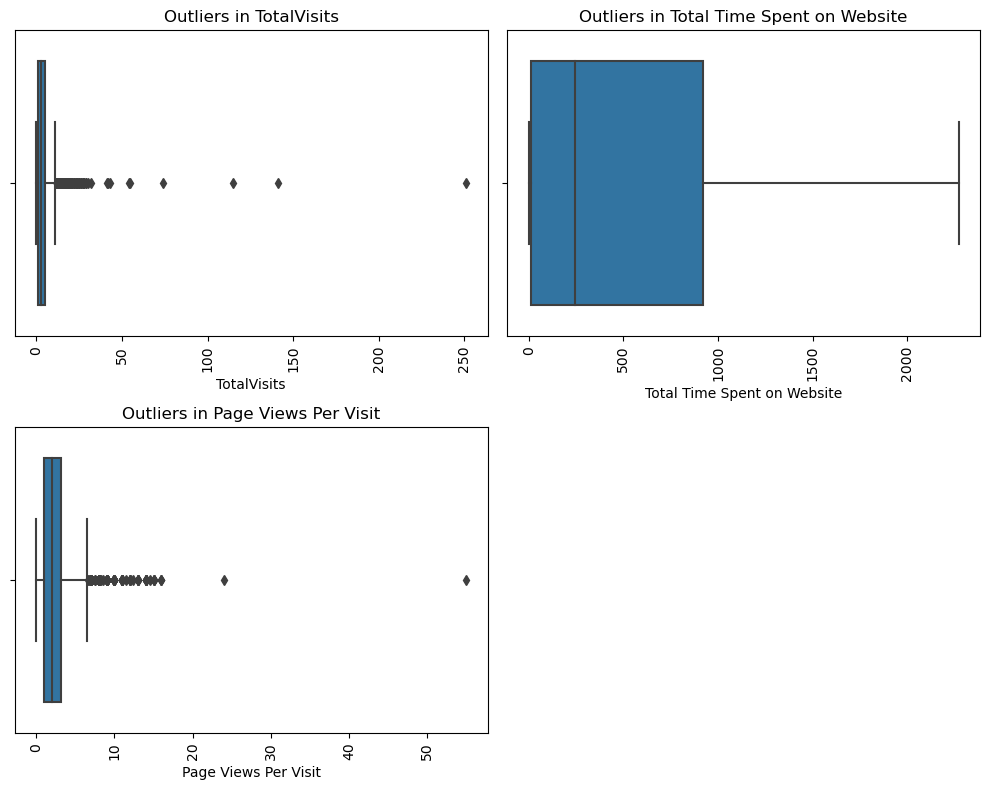

In [44]:
def boxplot(x,fig,):
    plt.subplot(2,2,fig)
    sns.boxplot(x = x, data =df)
    plt.title('Outliers in'+' '+ x)
    plt.xlabel(x)
    plt.xticks(rotation = 90)

                         
plt.figure(figsize =(10,8))
                         
boxplot('TotalVisits',1)
boxplot('Total Time Spent on Website',2)
boxplot('Page Views Per Visit',3)

plt.tight_layout()

Clearly you can see that there are outliers in the data. Let's remove them.

In [45]:
# removing outliers using the IQR
Q1 = df['TotalVisits'].quantile(0.01)
Q3 = df['TotalVisits'].quantile(0.99)
df = df.loc[(df['TotalVisits'] >= Q1) & (df['TotalVisits'] <= Q3)]

Q1 = df['Page Views Per Visit'].quantile(0.01)
Q3 = df['Page Views Per Visit'].quantile(0.99)
df=df.loc[(df['Page Views Per Visit'] >= Q1) & (df['Page Views Per Visit'] <= Q3)]

Q1 = df['Total Time Spent on Website'].quantile(0.01)
Q3 = df['Total Time Spent on Website'].quantile(0.99)
df=df.loc[(df['Total Time Spent on Website'] >= Q1) & (df['Total Time Spent on Website'] <= Q3)]

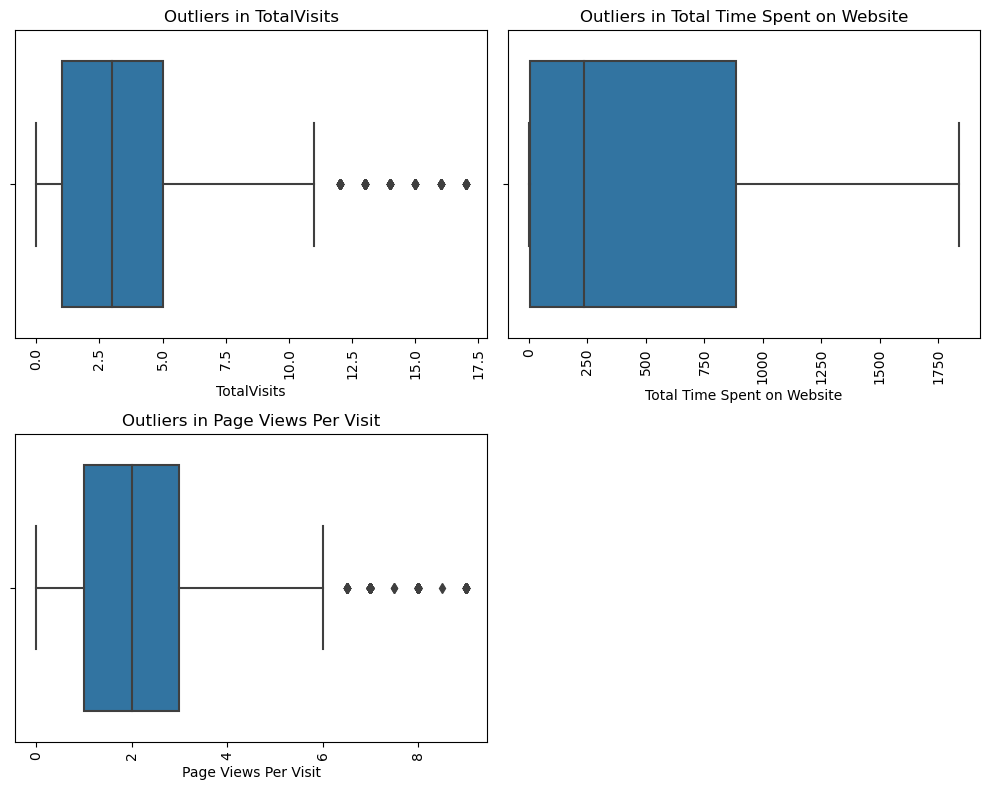

In [46]:
## After Treatment of outliers
plt.figure(figsize =(10,8))
                         
boxplot('TotalVisits',1)
boxplot('Total Time Spent on Website',2)
boxplot('Page Views Per Visit',3)

plt.tight_layout()

# 2: EDA

### 2.1 Univariate Analysis

In [47]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [48]:
df.shape

(8834, 21)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8834 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    8834 non-null   int64  
 1   Lead Origin                                    8834 non-null   object 
 2   Lead Source                                    8834 non-null   object 
 3   Do Not Email                                   8834 non-null   object 
 4   Do Not Call                                    8834 non-null   object 
 5   Converted                                      8834 non-null   int64  
 6   TotalVisits                                    8834 non-null   float64
 7   Total Time Spent on Website                    8834 non-null   int64  
 8   Page Views Per Visit                           8834 non-null   float64
 9   Last Activity                                  8834 

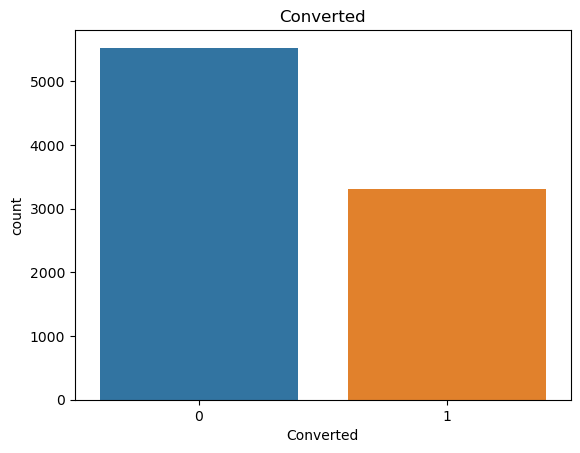

In [50]:
sns.countplot(df.Converted)
plt.title('Converted')
plt.show()

##### The target variable seems very well balanced. 

- Let us plot the categorical variables to understand the varience of the data

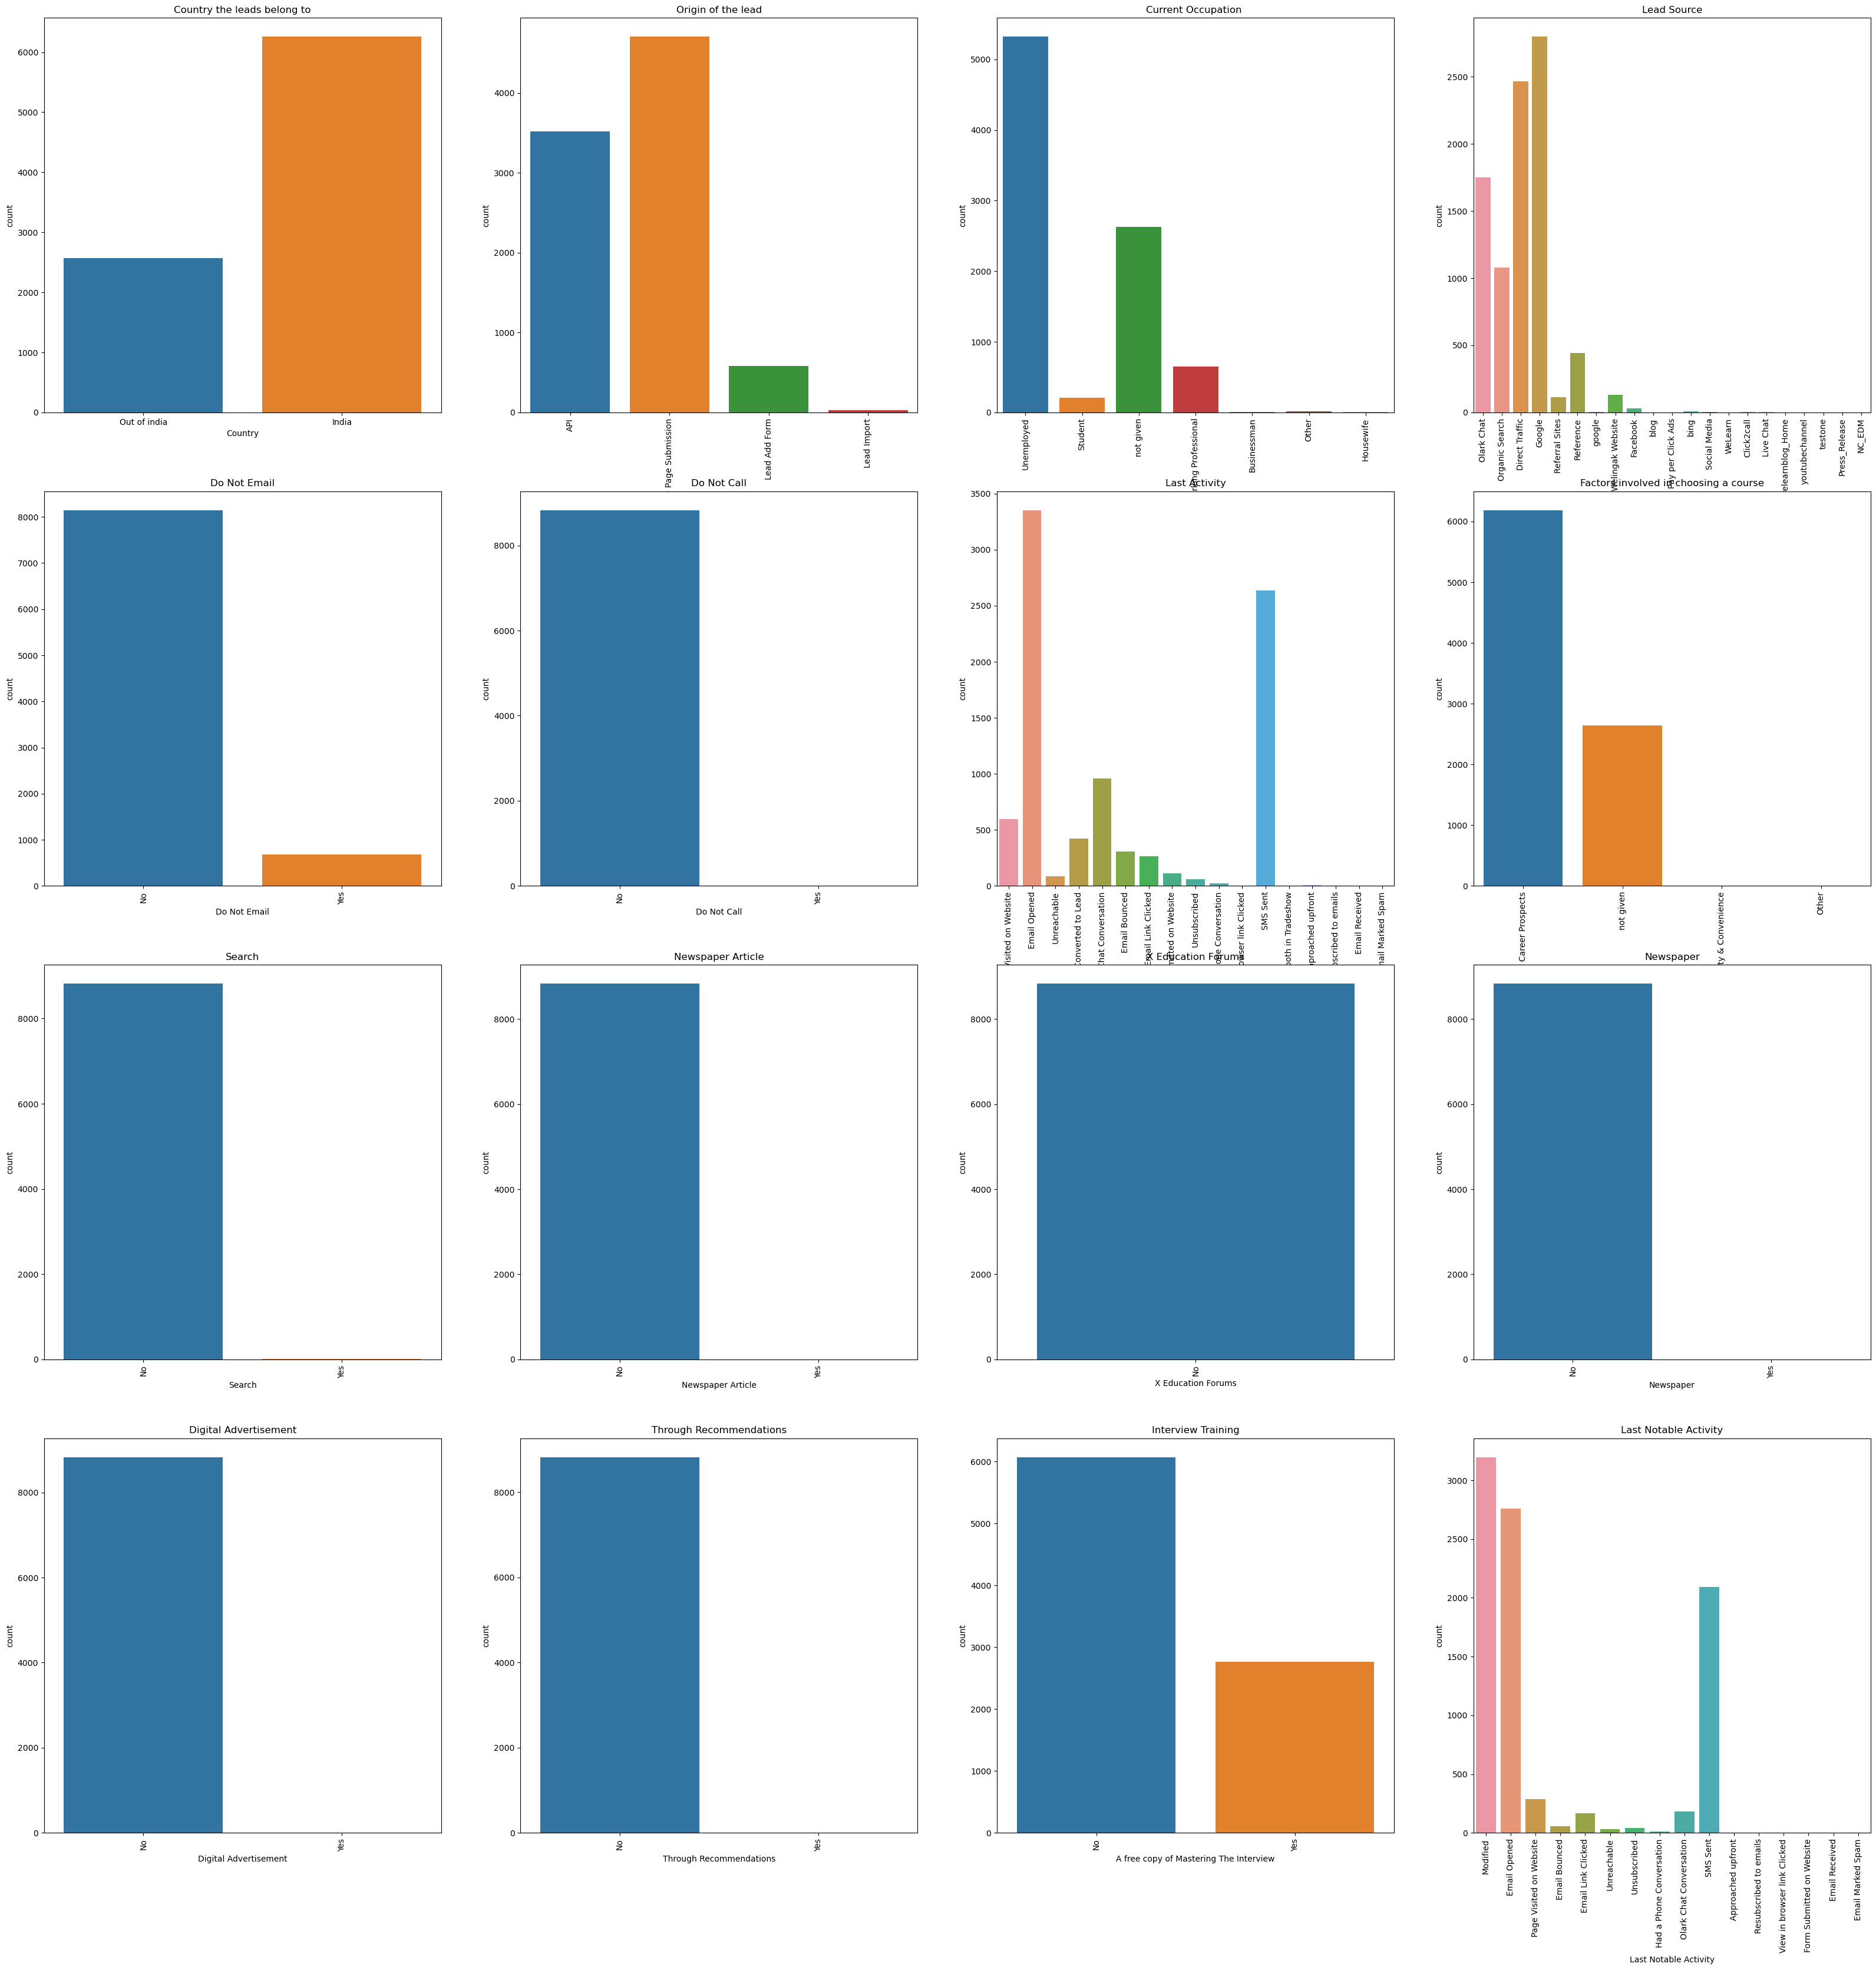

In [51]:
plt.figure(figsize = (40,40))

plt.subplot(4,4,1)

sns.countplot(df.Country)
plt.title('Country the leads belong to')


plt.subplot(4,4,2)

sns.countplot(df['Lead Origin']).tick_params(axis='x',rotation=90)
plt.title('Origin of the lead')

plt.subplot(4,4,3)

sns.countplot(df['What is your current occupation']).tick_params(axis='x',rotation=90)
plt.title('Current Occupation ')



plt.subplot(4,4,4)

sns.countplot(df['Lead Source']).tick_params(axis='x',rotation=90)
plt.title('Lead Source')



plt.subplot(4,4,5)
sns.countplot(df['Do Not Email']).tick_params(axis='x',rotation=90)
plt.title('Do Not Email')



plt.subplot(4,4,6)
sns.countplot(df['Do Not Call']).tick_params(axis='x',rotation=90)
plt.title('Do Not Call')



plt.subplot(4,4,7)
sns.countplot(df['Last Activity']).tick_params(axis='x',rotation=90)
plt.title('Last Activity')

plt.subplot(4,4,8)
sns.countplot(df['What matters most to you in choosing a course']).tick_params(axis='x',rotation=90)
plt.title('Factors involved in choosing a course')

plt.subplot(4,4,9)
sns.countplot(df['Search']).tick_params(axis='x',rotation=90)
plt.title('Search')

plt.subplot(4,4,10)
sns.countplot(df['Newspaper Article']).tick_params(axis='x',rotation=90)
plt.title('Newspaper Article')

plt.subplot(4,4,11)
sns.countplot(df['X Education Forums']).tick_params(axis='x',rotation=90)
plt.title('X Education Forums')

plt.subplot(4,4,12)
sns.countplot(df['Newspaper']).tick_params(axis='x',rotation=90)
plt.title('Newspaper')

plt.subplot(4,4,13)
sns.countplot(df['Digital Advertisement']).tick_params(axis='x',rotation=90)
plt.title('Digital Advertisement')

plt.subplot(4,4,14)
sns.countplot(df['Through Recommendations']).tick_params(axis='x',rotation=90)
plt.title('Through Recommendations')

plt.subplot(4,4,15)
sns.countplot(df['A free copy of Mastering The Interview']).tick_params(axis='x',rotation=90)
plt.title('Interview Training')

plt.subplot(4,4,16)
sns.countplot(df['Last Notable Activity']).tick_params(axis='x',rotation=90)
plt.title('Last Notable Activity')

plt.show()

- From the above, you can find that the columns like 'Do not call','Search', 'Newspaper Article', 'X Edication Forums', 'Newspaper','Digital Advertisement' & 'Thought Recommendations', a total 7 colums seems like no varience atall. They will clearly not contribute much to analysis & model.

#### Let us plot the Numerical variables to understand the varience of the data

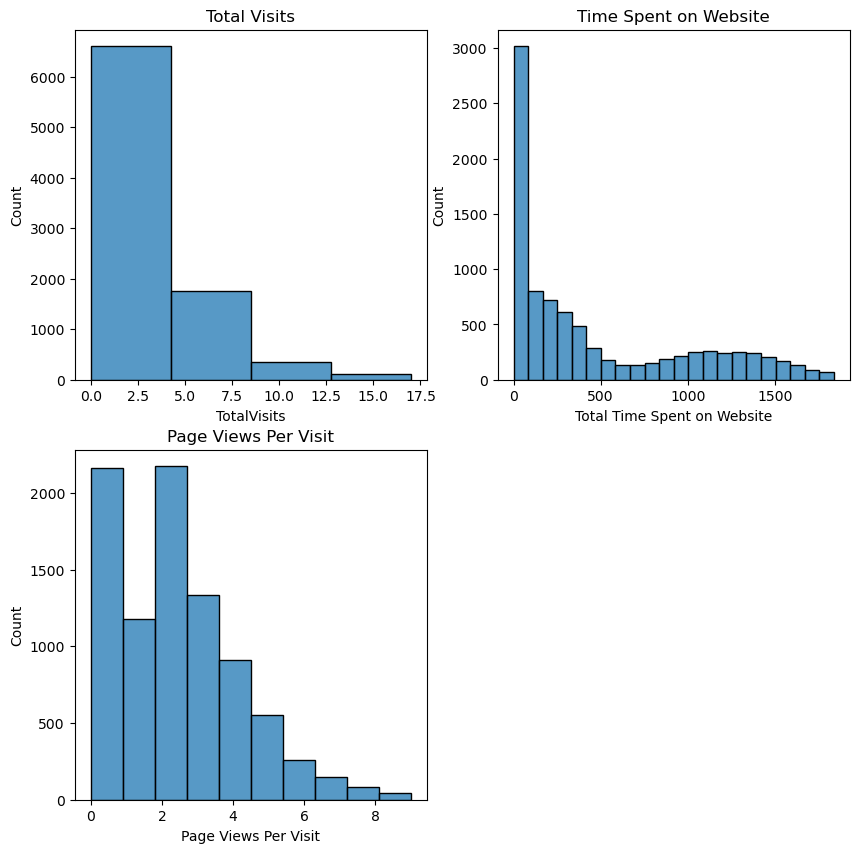

In [52]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)

sns.histplot(df['TotalVisits'], bins=4)
plt.title('Total Visits')

plt.subplot(2,2,2)

sns.histplot(df['Total Time Spent on Website'])
plt.title('Time Spent on Website')

plt.subplot(2,2,3)

sns.histplot(df['Page Views Per Visit'],bins=10)
plt.title('Page Views Per Visit')

plt.show()

- The above data seems fine. The data has some knid of varience. 

### 2.2 Bivariate Analysis

- Lets do the bivariate analysis with all the variables Vs. Target variable.

 Numerical Variable Vs Target variable

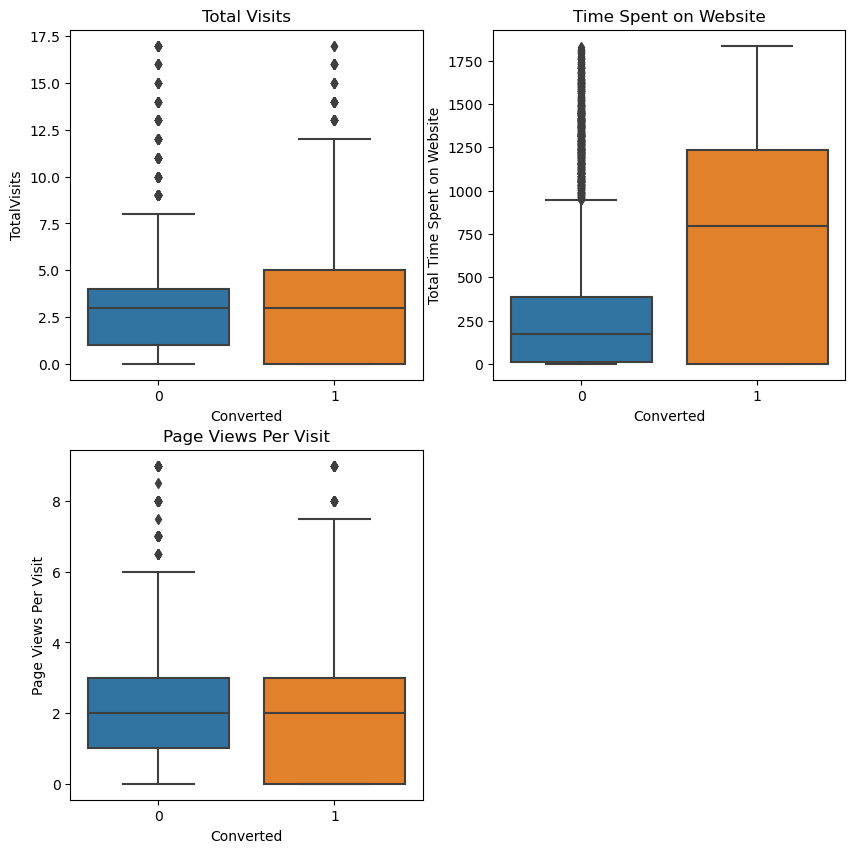

In [53]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)

sns.boxplot(df.Converted, df['TotalVisits'])
plt.title('Total Visits')

plt.subplot(2,2,2)

sns.boxplot(df.Converted, df['Total Time Spent on Website'])
plt.title('Time Spent on Website')

plt.subplot(2,2,3)

sns.boxplot(df.Converted, df['Page Views Per Visit'])
plt.title('Page Views Per Visit')

plt.show()

 Categorical Variable Vs Target variable

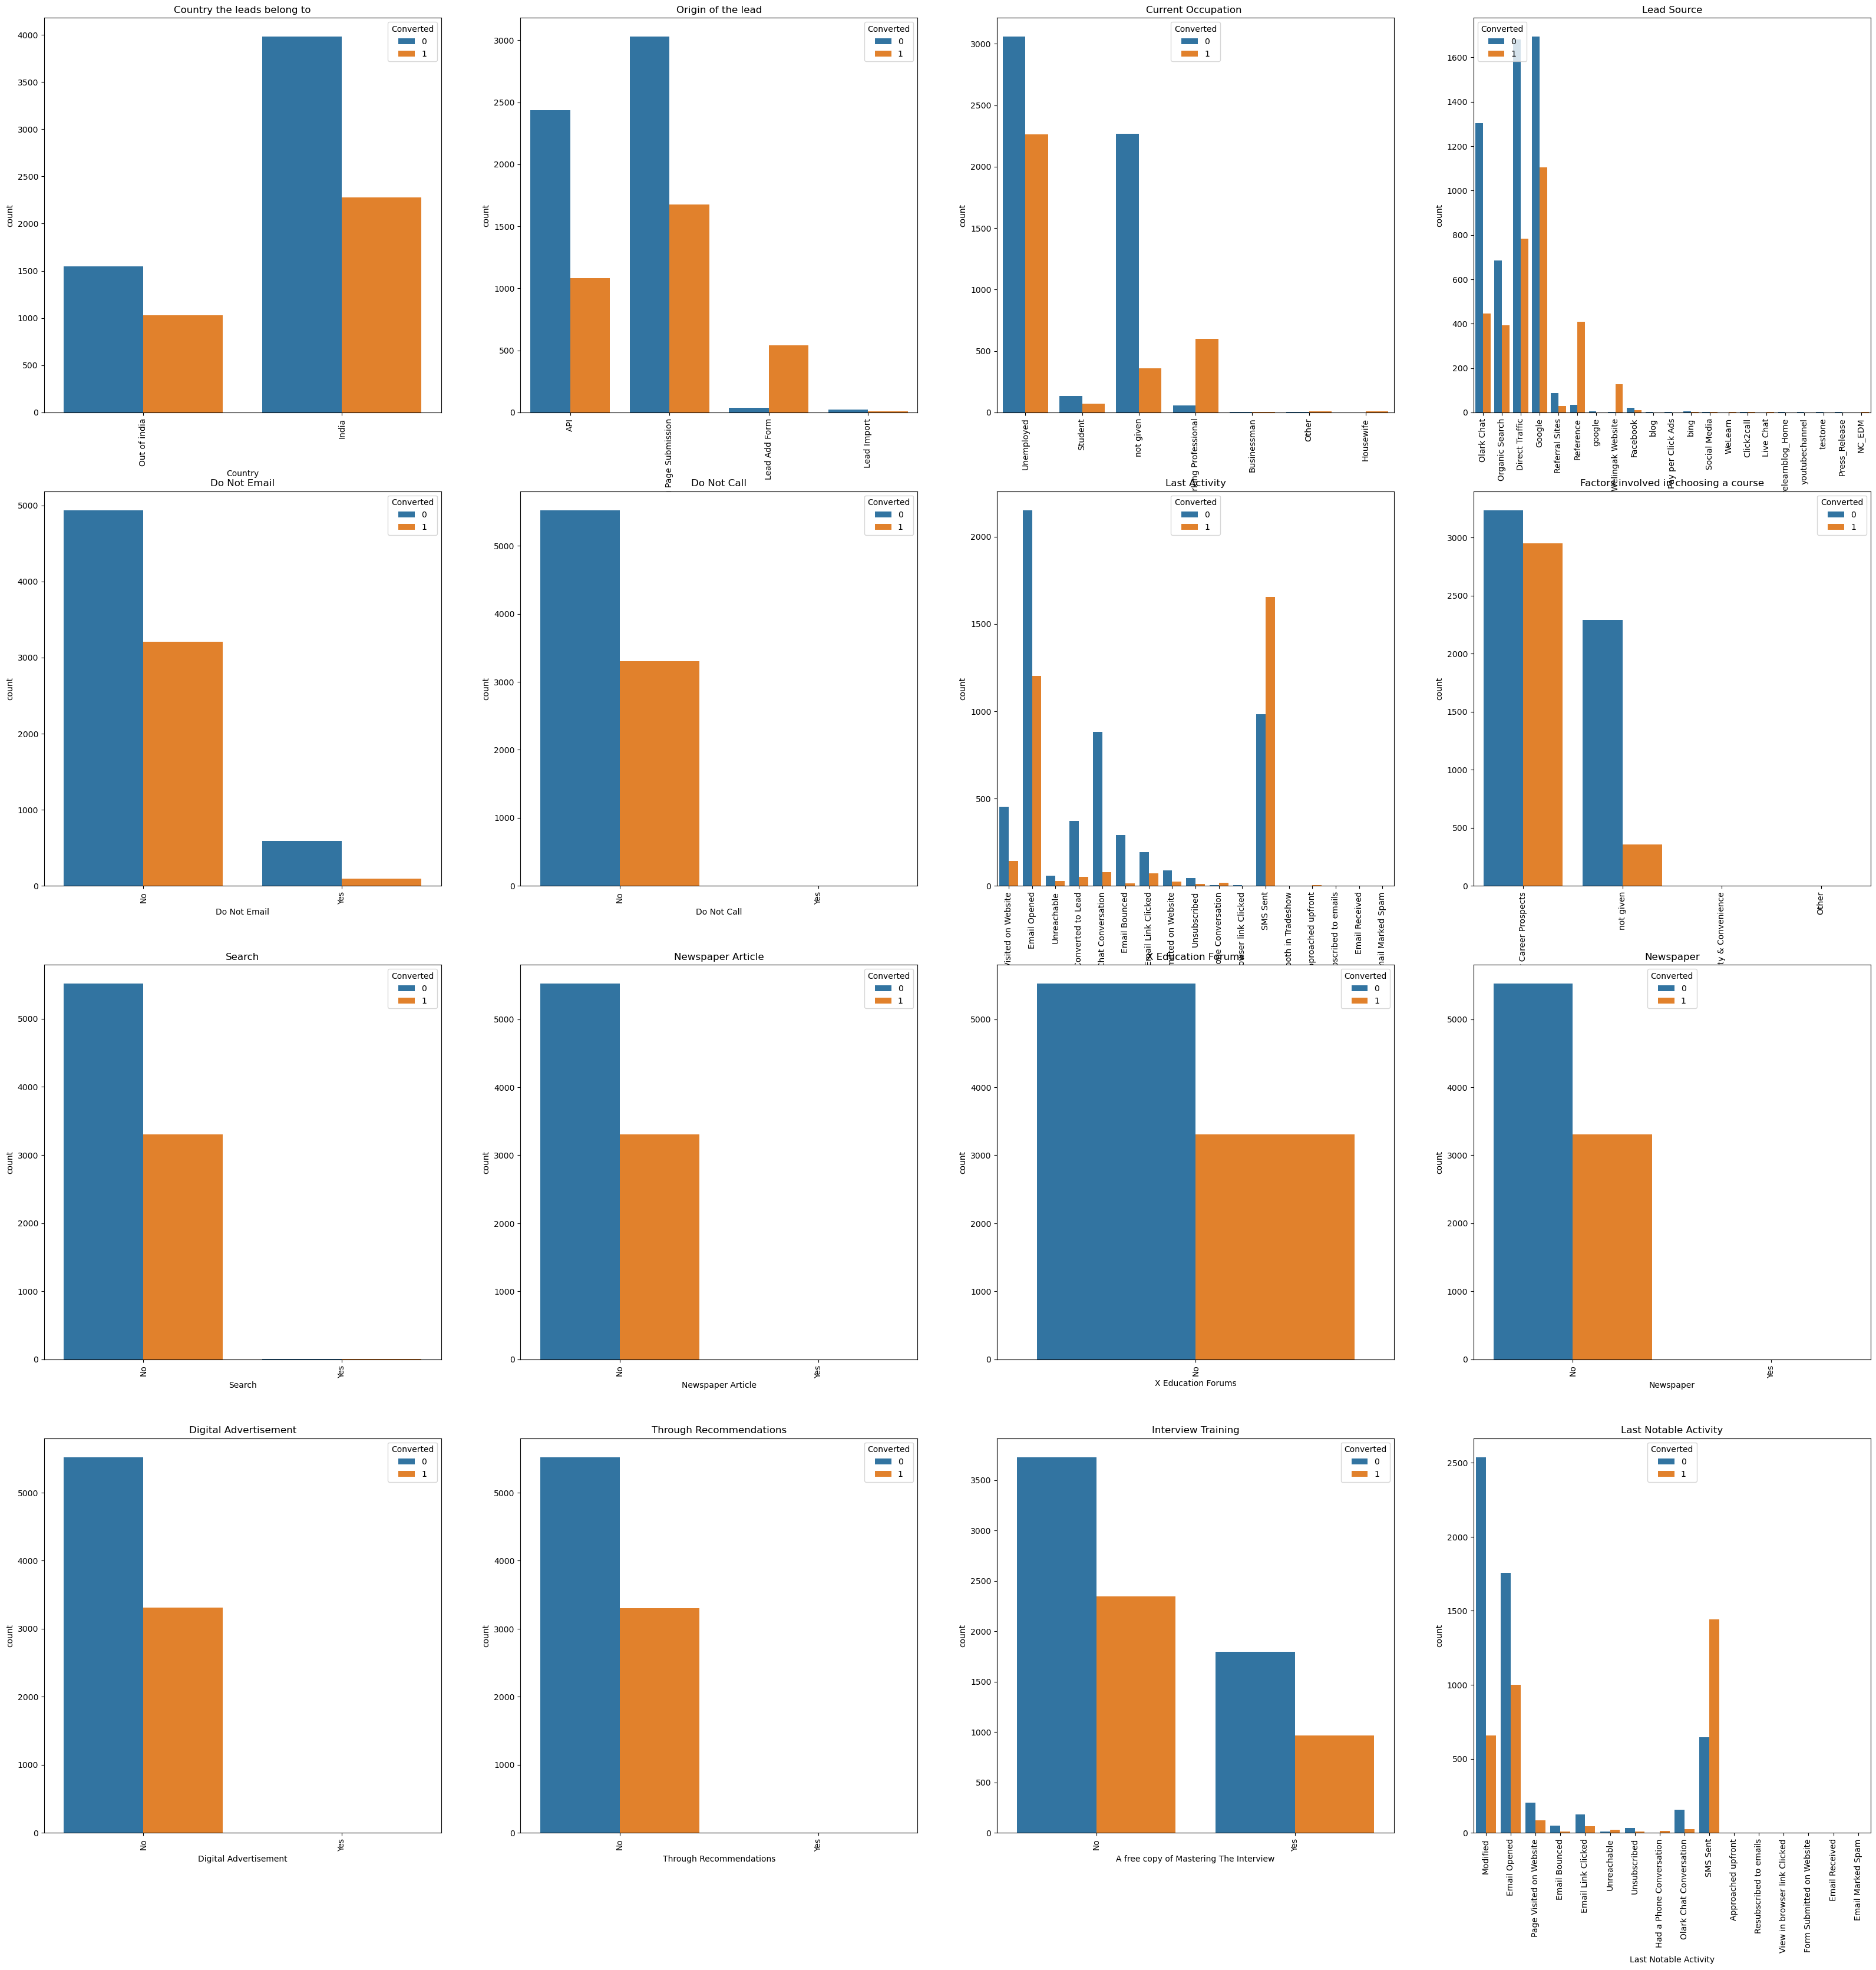

In [54]:
plt.figure(figsize = (40,40))

plt.subplot(4,4,1)

sns.countplot(x='Country', hue='Converted', data=df).tick_params(axis='x',rotation=90)
plt.title('Country the leads belong to')


plt.subplot(4,4,2)

sns.countplot(x='Lead Origin',hue='Converted', data=df).tick_params(axis='x',rotation=90)
plt.title('Origin of the lead')

plt.subplot(4,4,3)

sns.countplot(x='What is your current occupation',hue='Converted', data=df).tick_params(axis='x',rotation=90)
plt.title('Current Occupation ')



plt.subplot(4,4,4)

sns.countplot(x='Lead Source',hue='Converted', data=df).tick_params(axis='x',rotation=90)
plt.title('Lead Source')



plt.subplot(4,4,5)
sns.countplot(x='Do Not Email',hue='Converted', data=df).tick_params(axis='x',rotation=90)
plt.title('Do Not Email')



plt.subplot(4,4,6)
sns.countplot(x='Do Not Call',hue='Converted', data=df).tick_params(axis='x',rotation=90)
plt.title('Do Not Call')



plt.subplot(4,4,7)
sns.countplot(x='Last Activity',hue='Converted', data=df).tick_params(axis='x',rotation=90)
plt.title('Last Activity')

plt.subplot(4,4,8)
sns.countplot(x='What matters most to you in choosing a course',hue='Converted', data=df).tick_params(axis='x',rotation=90)
plt.title('Factors involved in choosing a course')

plt.subplot(4,4,9)
sns.countplot(x='Search',hue='Converted', data=df).tick_params(axis='x',rotation=90)
plt.title('Search')

plt.subplot(4,4,10)
sns.countplot(x='Newspaper Article',hue='Converted', data=df).tick_params(axis='x',rotation=90)
plt.title('Newspaper Article')

plt.subplot(4,4,11)
sns.countplot(x='X Education Forums',hue='Converted', data=df).tick_params(axis='x',rotation=90)
plt.title('X Education Forums')

plt.subplot(4,4,12)
sns.countplot(x='Newspaper',hue='Converted', data=df).tick_params(axis='x',rotation=90)
plt.title('Newspaper')

plt.subplot(4,4,13)
sns.countplot(x='Digital Advertisement',hue='Converted', data=df).tick_params(axis='x',rotation=90)
plt.title('Digital Advertisement')

plt.subplot(4,4,14)
sns.countplot(x='Through Recommendations',hue='Converted', data=df).tick_params(axis='x',rotation=90)
plt.title('Through Recommendations')

plt.subplot(4,4,15)
sns.countplot(x='A free copy of Mastering The Interview',hue='Converted', data=df).tick_params(axis='x',rotation=90)
plt.title('Interview Training')

plt.subplot(4,4,16)
sns.countplot(x='Last Notable Activity',hue='Converted', data=df).tick_params(axis='x',rotation=90)
plt.title('Last Notable Activity')

plt.show()

- We can clearly see that their is enough varience among the converted & non-converted leads with the data. 

### 2.3 Multivariate Analysis

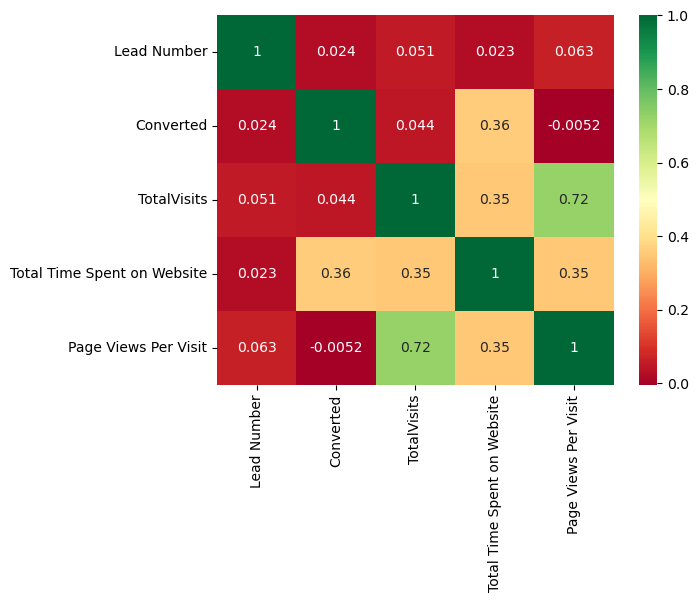

In [55]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.show()

- From above we can see that there is good corrolation b/w total visits Vs Time spent on website AND Time spent on wesite Vs Converted. 

# 3: Data processing for Modelling

### 3.1 Creating Dummies

In [56]:
#Find the names of the catagorical columns
object_columns = df.select_dtypes(include=['object']).columns

In [57]:
#finding the number of catagorical columns. 
len(object_columns)

16

In [58]:
#View the names of the columns.
object_columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [59]:
#Get a data frame with catagorical columns in it. 
df_dummies=df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity']]

In [60]:
# Create dummies for the above created dat frame using get_dummies function. \
df_dummies= pd.get_dummies(df_dummies, drop_first=True)
df_dummies.shape

(8834, 72)

In [61]:
#combine the dummies data frame with the numerical coulms. 
df_model=pd.concat([df,df_dummies], axis=1)
df_model.shape

(8834, 93)

In [62]:
#As we have received the dumies for the categorical colums. lets delete the original columns and keep the dummy columns. 
df_model.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1, inplace=True)
df_model.shape

(8834, 77)

# 4: Train/Test split

In [63]:
# Import the required library
from sklearn.model_selection import train_test_split

In [64]:
#Create the X variable consisting all the columns except the Target variable.
X=df_model.drop(['Converted'], axis=1)
X.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,1.0,305,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [65]:
# Create a y variable containing the target variable - 'Converted' 
y=df_model['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [66]:
#Spliting the data frame using train_test_split function. 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=45) 

- Scaling of the features using min-max scaler

In [67]:
#min-max scaler
from sklearn.preprocessing import MinMaxScaler

In [68]:
scaler=MinMaxScaler()

In [69]:
X_train[['Lead Number','TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['Lead Number','TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [70]:
X_train[['Lead Number','TotalVisits','Total Time Spent on Website','Page Views Per Visit']].head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit
8516,0.063440,0.235294,0.375612,0.222222
3998,0.519015,0.294118,0.378879,0.555556
5357,0.360083,0.117647,0.616766,0.222222
3247,0.608579,0.058824,0.618400,0.111111
2549,0.683677,0.117647,0.466522,0.222222


In [71]:
y_train.head()

8516    1
3998    1
5357    0
3247    0
2549    1
Name: Converted, dtype: int64

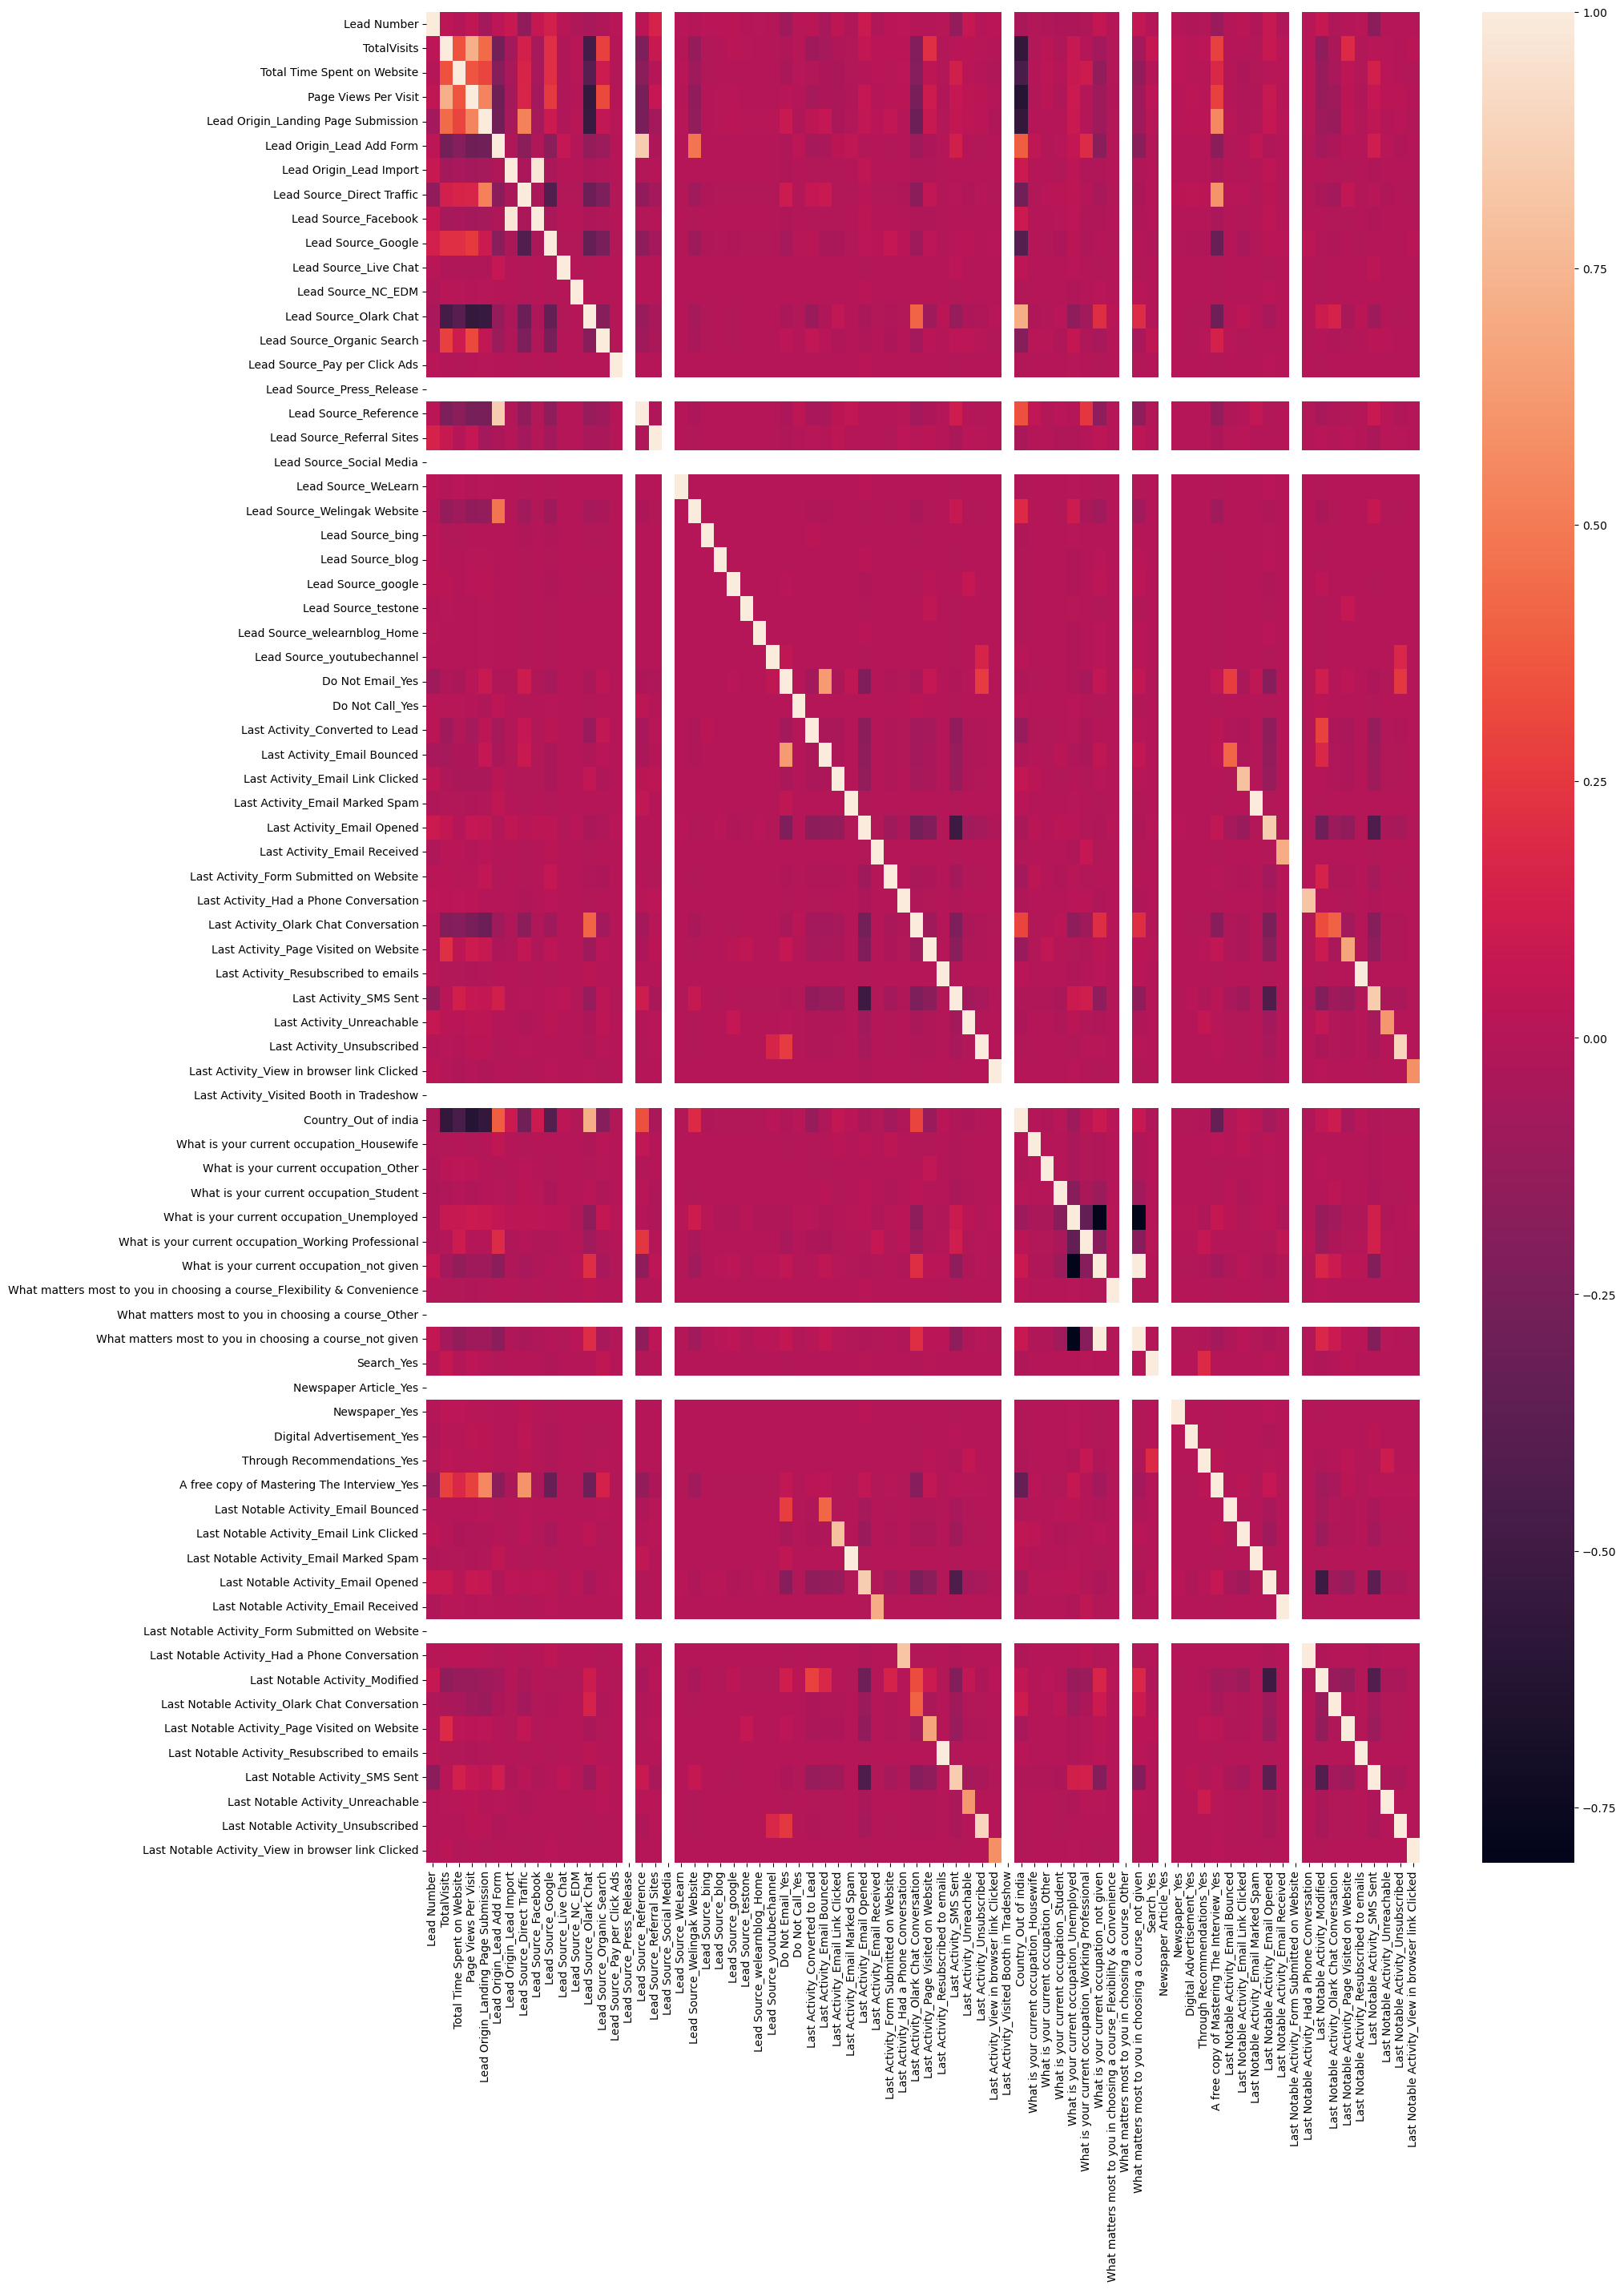

In [72]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

- Since there are a lot of variables it is difficult to drop variable. We'll do it after RFE



# 5: Model Building

In [73]:
#importing the required library.
import statsmodels.api as sm

### Model 1

In [74]:
# Logistic regression model 1
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6183
Model:                            GLM   Df Residuals:                     6114
Model Family:                Binomial   Df Model:                           68
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2388.9
Date:                Tue, 18 Apr 2023   Deviance:                       4777.7
Time:                        16:06:32   Pearson chi2:                 6.11e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4246
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      23.4740    1.3e+05      0.000      1.000   -2.55e+05    2.55e+05
Lead Number                                                                 0.8769      0.137      6.406      0.000       0.609       1.145
TotalVisits                                                                 2.0052      0.313      6.412      0.000       1.392       2.618
Total Time Spent on Website                                                 3.8398      0.149     25.803      0.000       3.548       4.131
Page Views Per Visit                                                       -1.4695      0.284     -5.167      0.000      -2.027      -0.912
Lead Origin_Landing Page Submission                                        -0.1313      0.112     -1.172      0.241      -0.351       0.088
Lead Origin_Lead Add Form                                                   0.9099      1.443      0.631      0.528      -1.918       3.738
Lead Origin_Lead Import                                                    24.9409   1.31e+05      0.000      1.000   -2.56e+05    2.56e+05
Lead Source_Direct Traffic                                                 -0.4066      2.054     -0.198      0.843      -4.432       3.619
Lead Source_Facebook                                                      -25.0349   1.31e+05     -0.000      1.000   -2.56e+05    2.56e+05
Lead Source_Google                                                         -0.1998      2.052     -0.097      0.922      -4.221       3.822
Lead Source_Live Chat                                                      23.2822   8.95e+04      0.000      1.000   -1.75e+05    1.76e+05
Lead Source_NC_EDM                                                         25.3394   1.32e+05      0.000      1.000   -2.58e+05    2.58e+05
Lead Source_Olark Chat                                                      0.8117      2.054      0.395      0.693      -3.214       4.838
Lead Source_Organic Search                                                 -0.2865      2.054     -0.139      0.889      -4.313       3.740
Lead Source_Pay per Click Ads                                             -23.3350   1.34e+05     -0.000      1.000   -2.62e+05    2.62e+05
Lead Source_Press_Release                                                3.338e-10   2.68e-05   1.25e-05      1.000   -5.25e-05    5.25e-05
Lead Source_Reference                                                       2.1888      1.478      1.481      0.139      -0.708       5.086
Lead Source_Referral Sites                                                 -0.8413      2.084     -0.404      0.686      -4.926       3.244
Lea

In [75]:
# Define and fit a logistic regression model
#log_model_1 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
#log_model_1_results = log_model_1.fit().summary()


#### let's build the model using RFE

In [76]:
#Importing the required libraries. 
from sklearn.linear_model import LogisticRegression

In [77]:
#Initalizing the Class object 'Logistic Regression' 
lr=LogisticRegression()

In [78]:
#Feature Selection Using RFE. Import the required library.
from sklearn.feature_selection import RFE

### Model 2

In [79]:
# Select the number of required columns as 15
rfe = RFE(lr, n_features_to_select=15)
rfe=rfe.fit(X_train, y_train)

In [80]:
rfe.support_

array([False,  True,  True,  True, False,  True, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False])

In [81]:
#Find the columns selectd by the RFE algo. 
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', False, 6),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 42),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', False, 27),
 ('Lead Source_Facebook', False, 35),
 ('Lead Source_Google', False, 33),
 ('Lead Source_Live Chat', False, 48),
 ('Lead Source_NC_EDM', False, 14),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Pay per Click Ads', False, 36),
 ('Lead Source_Press_Release', False, 57),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 21),
 ('Lead Source_Social Media', False, 60),
 ('Lead Source_WeLearn', False, 38),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 47),
 ('Lead Source_blog', False, 37),
 ('Lead Source_google', False, 31),
 ('Lead Source_testone', False, 39),
 ('Lead Source_welear

In [82]:
#Create the list of columns selected by the RFE. 
col = X_train.columns[rfe.support_]

In [83]:
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_not given',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [84]:
# Logistic regression model 2 using columns selected by RFE.
logm2 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6183
Model:                            GLM   Df Residuals:                     6167
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2536.5
Date:                Tue, 18 Apr 2023   Deviance:                       5072.9
Time:                        16:06:36   Pearson chi2:                 6.11e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3965
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const                                                      -2.3864      0.110    -21.679      0.000      -2.602      -2.171
TotalVisits                                                 1.9100      0.287      6.651      0.000       1.347       2.473
Total Time Spent on Website                                 3.8252      0.143     26.675      0.000       3.544       4.106
Page Views Per Visit                                       -1.1274      0.263     -4.292      0.000      -1.642      -0.613
Lead Origin_Lead Add Form                                   2.1482      0.921      2.333      0.020       0.343       3.953
Lead Source_Olark Chat                                      1.2944      0.125     10.316      0.000       1.048       1.540
Lead Source_Reference                                       1.7479      0.945      1.850      0.064      -0.103       3.599
Lead Source_Welingak Website                                4.3001      1.365      3.150      0.002       1.625       6.975
Do Not Email_Yes                                           -1.5600      0.177     -8.835      0.000      -1.906      -1.214
Last Activity_Had a Phone Conversation                      0.5208      1.202      0.433      0.665      -1.836       2.878
Last Activity_SMS Sent                                      1.5280      0.076     20.122      0.000       1.379       1.677
What is your current occupation_Housewife                  23.0207   1.48e+04      0.002      0.999    -2.9e+04     2.9e+04
What is your current occupation_Working Professional        2.6294      0.196     13.385      0.000       2.244       3.014
What matters most to you in choosing a course_not given    -1.2479      0.087    -14.414      0.000      -1.418      -1.078
Last Notable Activity_Had a Phone Conversation              2.9893      1.686      1.773      0.076      -0.315       6.293
Last Notable Activity_Unreachable                           2.2707      0.555      4.091      0.000       1.183       3.359
===========================================================================================================================
"""

In [85]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,60.21
5,Lead Source_Reference,46.19
6,Lead Source_Welingak Website,15.17
2,Page Views Per Visit,4.97
0,TotalVisits,4.50
8,Last Activity_Had a Phone Conversation,3.01
13,Last Notable Activity_Had a Phone Conversation,3.01
1,Total Time Spent on Website,2.05
9,Last Activity_SMS Sent,1.49
12,What matters most to you in choosing a course_...,1.46


- We have to aim to acheive the P-values less than 0.05 and VIF values less than 5

- As 'Last Notable Activity_Had a Phone Conversation' has the highest P-value, let's drop the column.

In [87]:
#Dropping the columns which has highest P-value. 
col_1=col.drop('Last Notable Activity_Had a Phone Conversation')

In [88]:
#Check the number of left out columns.
len(col_1)

14

In [89]:
col_1

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_not given',
       'Last Notable Activity_Unreachable'],
      dtype='object')

### Model 3

In [90]:
# Logistic regression model 3
logm3 = sm.GLM(y_train,(sm.add_constant(X_train[col_1])), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6183
Model:                            GLM   Df Residuals:                     6168
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2537.8
Date:                Tue, 18 Apr 2023   Deviance:                       5075.7
Time:                        16:06:36   Pearson chi2:                 6.11e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3962
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const                                                      -2.3832      0.110    -21.668      0.000      -2.599      -2.168
TotalVisits                                                 1.8939      0.287      6.595      0.000       1.331       2.457
Total Time Spent on Website                                 3.8179      0.143     26.649      0.000       3.537       4.099
Page Views Per Visit                                       -1.1164      0.262     -4.254      0.000      -1.631      -0.602
Lead Origin_Lead Add Form                                   2.1465      0.921      2.332      0.020       0.342       3.951
Lead Source_Olark Chat                                      1.2911      0.125     10.298      0.000       1.045       1.537
Lead Source_Reference                                       1.7417      0.944      1.844      0.065      -0.109       3.593
Lead Source_Welingak Website                                4.2987      1.365      3.150      0.002       1.624       6.974
Do Not Email_Yes                                           -1.5593      0.176     -8.836      0.000      -1.905      -1.213
Last Activity_Had a Phone Conversation                      2.5566      0.936      2.730      0.006       0.721       4.392
Last Activity_SMS Sent                                      1.5269      0.076     20.120      0.000       1.378       1.676
What is your current occupation_Housewife                  23.0202   1.48e+04      0.002      0.999    -2.9e+04    2.91e+04
What is your current occupation_Working Professional        2.6293      0.196     13.389      0.000       2.244       3.014
What matters most to you in choosing a course_not given    -1.2457      0.087    -14.400      0.000      -1.415      -1.076
Last Notable Activity_Unreachable                           2.2688      0.555      4.089      0.000       1.181       3.356
===========================================================================================================================
"""

In [91]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col_1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_1].values, i) for i in range(X_train[col_1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,60.21
5,Lead Source_Reference,46.18
6,Lead Source_Welingak Website,15.17
2,Page Views Per Visit,4.96
0,TotalVisits,4.50
1,Total Time Spent on Website,2.05
9,Last Activity_SMS Sent,1.49
12,What matters most to you in choosing a course_...,1.46
4,Lead Source_Olark Chat,1.26
11,What is your current occupation_Working Profes...,1.20


 - As 'What is your current occupation_Housewife' has the highest P-value, let's drop it.

In [92]:
#Dropping the columns which has highest P-value. 
col_2=col_1.drop('What is your current occupation_Housewife')

### Model 4

In [93]:
# Logistic regression model 4
logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col_2])), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6183
Model:                            GLM   Df Residuals:                     6169
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2544.5
Date:                Tue, 18 Apr 2023   Deviance:                       5089.0
Time:                        16:06:36   Pearson chi2:                 6.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3949
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const                                                      -2.3673      0.110    -21.587      0.000      -2.582      -2.152
TotalVisits                                                 1.8822      0.287      6.561      0.000       1.320       2.444
Total Time Spent on Website                                 3.8146      0.143     26.657      0.000       3.534       4.095
Page Views Per Visit                                       -1.1228      0.262     -4.282      0.000      -1.637      -0.609
Lead Origin_Lead Add Form                                   2.1355      0.920      2.321      0.020       0.333       3.939
Lead Source_Olark Chat                                      1.2796      0.125     10.223      0.000       1.034       1.525
Lead Source_Reference                                       1.7651      0.944      1.871      0.061      -0.084       3.615
Lead Source_Welingak Website                                4.2973      1.364      3.150      0.002       1.623       6.971
Do Not Email_Yes                                           -1.5640      0.176     -8.863      0.000      -1.910      -1.218
Last Activity_Had a Phone Conversation                      2.5484      0.936      2.722      0.006       0.713       4.384
Last Activity_SMS Sent                                      1.5194      0.076     20.040      0.000       1.371       1.668
What is your current occupation_Working Professional        2.6216      0.196     13.354      0.000       2.237       3.006
What matters most to you in choosing a course_not given    -1.2505      0.086    -14.465      0.000      -1.420      -1.081
Last Notable Activity_Unreachable                           2.2635      0.555      4.078      0.000       1.176       3.351
===========================================================================================================================
"""

In [94]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col_2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_2].values, i) for i in range(X_train[col_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,60.21
5,Lead Source_Reference,46.18
6,Lead Source_Welingak Website,15.17
2,Page Views Per Visit,4.96
0,TotalVisits,4.50
1,Total Time Spent on Website,2.04
9,Last Activity_SMS Sent,1.49
11,What matters most to you in choosing a course_...,1.46
4,Lead Source_Olark Chat,1.26
10,What is your current occupation_Working Profes...,1.20


- As 'Lead Origin_Lead Add Form' has the highest P-value, let's drop it.

In [95]:
#Dropping the columns which has highest P-value. 
col_3=col_2.drop('Lead Origin_Lead Add Form')

### Model 5

In [96]:
# Logistic regression model 5
logm5 = sm.GLM(y_train,(sm.add_constant(X_train[col_3])), family = sm.families.Binomial())
res=logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6183
Model:                            GLM   Df Residuals:                     6170
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2547.5
Date:                Tue, 18 Apr 2023   Deviance:                       5095.0
Time:                        16:06:36   Pearson chi2:                 6.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3943
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const                                                      -2.3473      0.109    -21.500      0.000      -2.561      -2.133
TotalVisits                                                 1.8760      0.286      6.559      0.000       1.315       2.437
Total Time Spent on Website                                 3.8052      0.143     26.623      0.000       3.525       4.085
Page Views Per Visit                                       -1.1512      0.262     -4.396      0.000      -1.664      -0.638
Lead Source_Olark Chat                                      1.2651      0.125     10.132      0.000       1.020       1.510
Lead Source_Reference                                       3.8815      0.245     15.826      0.000       3.401       4.362
Lead Source_Welingak Website                                6.4138      1.015      6.317      0.000       4.424       8.404
Do Not Email_Yes                                           -1.5672      0.176     -8.886      0.000      -1.913      -1.222
Last Activity_Had a Phone Conversation                      2.5464      0.936      2.721      0.007       0.712       4.381
Last Activity_SMS Sent                                      1.5193      0.076     20.047      0.000       1.371       1.668
What is your current occupation_Working Professional        2.6164      0.196     13.332      0.000       2.232       3.001
What matters most to you in choosing a course_not given    -1.2553      0.086    -14.530      0.000      -1.425      -1.086
Last Notable Activity_Unreachable                           2.2627      0.555      4.075      0.000       1.175       3.351
===========================================================================================================================
"""

In [97]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col_3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_3].values, i) for i in range(X_train[col_3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,4.96
0,TotalVisits,4.50
1,Total Time Spent on Website,2.04
8,Last Activity_SMS Sent,1.49
10,What matters most to you in choosing a course_...,1.46
3,Lead Source_Olark Chat,1.26
9,What is your current occupation_Working Profes...,1.20
4,Lead Source_Reference,1.15
6,Do Not Email_Yes,1.08
5,Lead Source_Welingak Website,1.03


- The above model-5 has the minimum p-values & very accecptable VIF values. This model performance seems good. Let's calculate the metrics below.

###### Predicting the training set values

In [98]:
#Adding a constant colum to the training data set. 
X_train_sm=sm.add_constant(X_train)

In [99]:
# Predicting the values of the using the above model out put. 
y_train_pred=res.predict(sm.add_constant(X_train[col_3]))
y_train_pred[:10]

8516    0.384993
3998    0.095462
5357    0.491117
3247    0.497059
2549    0.971488
7919    0.649551
7194    0.088061
4608    0.216869
682     0.423364
520     0.122265
dtype: float64

In [100]:
#Rearranging the predicted values to calculate the metrics.
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.3849931 , 0.09546228, 0.49111714, 0.49705914, 0.97148818,
       0.64955058, 0.08806143, 0.21686896, 0.42336425, 0.12226549])

In [101]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final=pd.DataFrame({'Converted':y_train.values, 'Conversion Probability':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion Probability
0,1,0.384993
1,1,0.095462
2,0,0.491117
3,0,0.497059
4,1,0.971488


In [102]:
#let us keep the cutoff probabilty value as 0.5 & add the predicted colum to the dataframe
y_train_pred_final['Predicted']=y_train_pred_final['Conversion Probability'].map(lambda x: 0 if x< 0.5 else 1)

In [103]:
y_train_pred_final.head()

,Converted,Conversion Probability,Predicted
0,1,0.384993,0
1,1,0.095462,0
2,0,0.491117,0
3,0,0.497059,0
4,1,0.971488,1


In [104]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [105]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3426,  424],
       [ 739, 1594]])

In [106]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.811903606663432

The model has acheived an accuracy of 81%

# 6: Metrics beyond simply accuracy

In [107]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [108]:
#sensitivity

TP/(TP+FN)

0.6832404629232748

In [109]:
# Calculating the specificity
TN/(TN+FP)

0.8898701298701299

#### WIth the obtained cutoff we got an accuracy of 81%, Specificity of 89% & Sensitivity of 68%

##### Recall (TP / TP + FN)

In [110]:
# Recall
TP/(TP+FN)

0.6832404629232748

##### Precision (TP / TP + FP)

In [111]:
##### Precision
TP / (TP + FP)

0.7898909811694748

#### With the current cut off of 0.5, we have got the Recall at 69% and the precision as 79%

In [112]:
# Calculate false postive rate
print("False positive rate:",FP/ float(TN+FP))

# Positive predictive value (Sensitivity)
print("Positive Predictive rate:",TP / float(TP+FP))

# Negative predictive value 
print("Negative Predictive rate:",TN / float(TN+ FN))

False positive rate: 0.11012987012987013
Positive Predictive rate: 0.7898909811694748
Negative Predictive rate: 0.8225690276110444


In [113]:
#classification report
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.Predicted))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      3850
           1       0.79      0.68      0.73      2333

    accuracy                           0.81      6183
   macro avg       0.81      0.79      0.79      6183
weighted avg       0.81      0.81      0.81      6183



#### Let us plot the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [114]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [115]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final['Conversion Probability'], drop_intermediate = False )

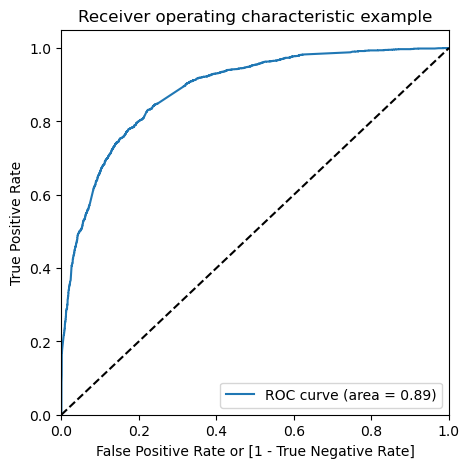

In [116]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final['Conversion Probability'])

The are under the RoC curve is 0.89 which is a good value.

In [117]:
### Finding Optimal Cutoff Point

## Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Conversion Probability'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.384993,0,1,1,1,1,0,0,0,0,0,0
1,1,0.095462,0,1,0,0,0,0,0,0,0,0,0
2,0,0.491117,0,1,1,1,1,1,0,0,0,0,0
3,0,0.497059,0,1,1,1,1,1,0,0,0,0,0
4,1,0.971488,1,1,1,1,1,1,1,1,1,1,1


In [118]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.377325  1.000000  0.000000
0.1   0.1  0.625748  0.973425  0.415065
0.2   0.2  0.749474  0.917703  0.647532
0.3   0.3  0.796701  0.831547  0.775584
0.4   0.4  0.810610  0.756537  0.843377
0.5   0.5  0.811904  0.683240  0.889870
0.6   0.6  0.803979  0.617231  0.917143
0.7   0.7  0.781659  0.504929  0.949351
0.8   0.8  0.764516  0.425204  0.970130
0.9   0.9  0.718260  0.273039  0.988052


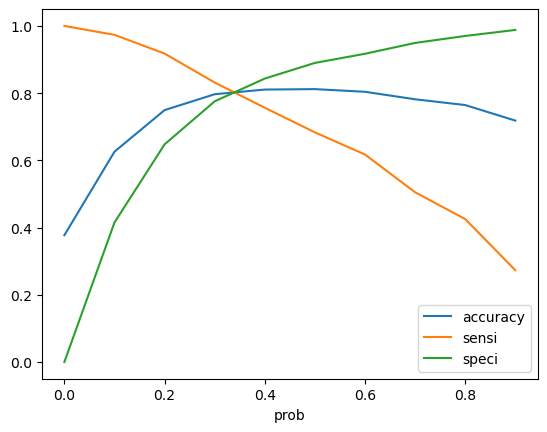

In [119]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- from the above we can observe that 0.35 is the point where all metrics meet. 0.35 is the optimal probability.

In [120]:
#Now use 0.35 as cut off and assign the probability of conversion as1 if more that 0.35 & 0 if less than 0.35.
y_train_pred_final['final_prediction']= y_train_pred_final['Conversion Probability'].map(lambda x: 1 if x > 0.35 else 0)

In [121]:
y_train_pred_final.head()

,Converted,Conversion Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_prediction
0,1,0.384993,0,1,1,1,1,0,0,0,0,0,0,1
1,1,0.095462,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.491117,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.497059,0,1,1,1,1,1,0,0,0,0,0,1
4,1,0.971488,1,1,1,1,1,1,1,1,1,1,1,1


In [122]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_prediction)
confusion

array([[3124,  726],
       [ 495, 1838]])

In [123]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_prediction)

0.8025230470645318

The model has acheived an accuracy of 80%

#### Metric beyond Accuracy

In [124]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [125]:
# Calculating the specificity
TN/(TN+FP)

0.8114285714285714

In [126]:
#sensitivity

TP/(TP+FN)

0.7878268324046293

#### WIth the obtained cutoff we got an accuracy of 80%, Specificity of 81% & Sensitivity of 79%

#### Recall & Precision value calculations

In [127]:
##### Recall
#TP / TP + FN

TP/(TP+FN)

0.7878268324046293

In [128]:
##### Precision
#TP / TP + FP

##### Precision
TP / (TP + FP)

0.7168486739469578

#### With the current cut off of 0.35, we have got the Recall at 78.7% and the precision as 72%

In [129]:
# Calculate false postive rate
print("False positive rate:",FP/ float(TN+FP))

# Positive predictive value 
print("Positive Predictive rate:",TP / float(TP+FP))

# Negative predictive value
print("Negative Predictive rate:",TN / float(TN+ FN))

False positive rate: 0.18857142857142858
Positive Predictive rate: 0.7168486739469578
Negative Predictive rate: 0.8632218844984803


In [130]:
#classification report
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.Predicted))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      3850
           1       0.79      0.68      0.73      2333

    accuracy                           0.81      6183
   macro avg       0.81      0.79      0.79      6183
weighted avg       0.81      0.81      0.81      6183



# 7: Prediction on Test Set

In [131]:
#Scale the test dataset using transform function.
X_test[['Lead Number','TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.transform(X_test[['Lead Number','TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [132]:
X_test[['Lead Number','TotalVisits','Total Time Spent on Website','Page Views Per Visit']].head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit
4491,0.456733,0.000000,0.000000,0.000000
6969,0.204947,0.117647,0.003811,0.222222
5504,0.346959,0.235294,0.237343,0.444444
3017,0.632412,0.235294,0.638541,0.444444
5346,0.361093,0.176471,0.597169,0.166667


In [133]:
#Create the test dataset dataframe with the columns included in the final model. 
X_test=X_test[col_3]

In [134]:
#Add constant to the above data set.
X_test_sm=sm.add_constant(X_test)

In [135]:
#Predict the values using final model. 
y_test_pred= res.predict(X_test_sm)

In [136]:
y_test_pred[:10]

4491    0.306144
6969    0.085651
5504    0.180286
3017    0.223900
5346    0.945246
4755    0.085014
9019    0.716160
2802    0.037073
8985    0.089626
6235    0.253080
dtype: float64

In [137]:
#Rearranging the predicted values to calculate the metrics.
y_test_pred=y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.30614434, 0.08565124, 0.1802856 , 0.22390049, 0.94524611,
       0.08501364, 0.71615981, 0.03707295, 0.08962561, 0.25307988])

In [138]:
# Data frame with given convertion rate and probablity of predicted ones
y_test_pred_final=pd.DataFrame({'Converted':y_test.values, 'Conversion_prob':y_test_pred})
y_test_pred_final.head()

,Converted,Conversion_prob
0,0,0.306144
1,0,0.085651
2,0,0.180286
3,1,0.223900
4,1,0.945246


In [139]:
# Use 0.35 as the cutoff & predict the outcome. 
y_test_pred_final['prediction']=y_test_pred_final.Conversion_prob.map(lambda x: 1 if x> 0.35 else 0)

In [140]:
y_test_pred_final.head()

,Converted,Conversion_prob,prediction
0,0,0.306144,0
1,0,0.085651,0
2,0,0.180286,0
3,1,0.223900,0
4,1,0.945246,1


In [141]:
#confusion matrix.

confusion=metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.prediction)
confusion

array([[1370,  305],
       [ 189,  787]])

In [142]:
accuracy=metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.prediction)
accuracy

0.8136552244436062

In [143]:
## Metric beyond Accuracy
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [144]:
# Calculating the specificity
TN/(TN+FP)

0.817910447761194

In [145]:
#sensitivity

TP/(TP+FN)

0.8063524590163934

### for the cut off of 0.35 obtained from the test data has given us the results of Accuracy - 80%, Specificity- 82% & Sensitivity - 80%

### Precision & Recall values

In [146]:
##### Precision
TP / (TP + FP)

0.7206959706959707

In [147]:
#Recall

TP/(TP+FN)

0.8063524590163934

### for the cut off of 0.35 obtained from the test data has given us the results of Precision - 72% & Recall - 80%

In [148]:
# Calculate false postive rate
print("False positive rate:",FP/ float(TN+FP))

# Positive predictive value 
print("Positive Predictive rate:",TP / float(TP+FP))

# Negative predictive value
print("Negative Predictive rate:",TN / float(TN+ FN))

False positive rate: 0.18208955223880596
Positive Predictive rate: 0.7206959706959707
Negative Predictive rate: 0.8787684413085312


In [149]:
#classification report
print(classification_report(y_test_pred_final.Converted, y_test_pred_final.prediction))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1675
           1       0.72      0.81      0.76       976

    accuracy                           0.81      2651
   macro avg       0.80      0.81      0.80      2651
weighted avg       0.82      0.81      0.82      2651



### Finding the cutoff using the Precision - Recall Tradeo off and check weather if we can improve the model performance.

#### Precision - Recall Tradeoff

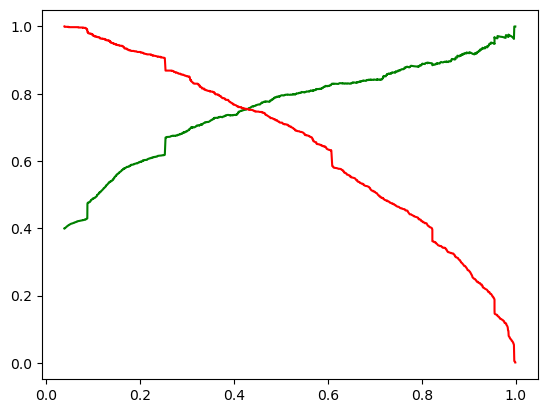

In [150]:
# Precision and recall tradeoff

from sklearn.metrics import precision_recall_curve

y_test_pred_final.Converted, y_test_pred_final['Conversion_prob']

p, r, thresholds = precision_recall_curve(y_test_pred_final.Converted, y_test_pred_final['Conversion_prob'])

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

From the above, it is clearly seen that the trade off is happening @ 0.4 

Let us try evaluating the model performance @ 0.4 and see if we can get some better results

#### train data model performance evaluation with 0.4 as a cut-off

In [151]:
#Now use 0.35 as cut off and assign the probability of conversion as1 if more that 0.4 & 0 if less than 0.4.
y_train_pred_final['final_prediction']= y_train_pred_final['Conversion Probability'].map(lambda x: 1 if x > 0.4 else 0)

In [152]:
y_train_pred_final.head()

,Converted,Conversion Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_prediction
0,1,0.384993,0,1,1,1,1,0,0,0,0,0,0,0
1,1,0.095462,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.491117,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.497059,0,1,1,1,1,1,0,0,0,0,0,1
4,1,0.971488,1,1,1,1,1,1,1,1,1,1,1,1


In [153]:
# Create the confusion Mateic
confusion=metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final['final_prediction'])

In [154]:
confusion

array([[3247,  603],
       [ 568, 1765]])

In [155]:
#Find the accuracy with the new cut off value.
accuracy=metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final['final_prediction'])
accuracy

0.8106097363739285

In [156]:
## Metric beyond Accuracy
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [157]:
# Calculating the specificity
TN/(TN+FP)

0.8433766233766233

In [158]:
#sensitivity

TP/(TP+FN)

0.7565366480925847

### for the cut off of 0.4 (training set)  we have obtained from the results of Accuracy - 81%, Specificity- 84% & Sensitivity - 75.6%

Precision & Recall calculations

In [159]:
##### Precision
TP / (TP + FP)

0.7453547297297297

In [160]:
#Recall

TP/(TP+FN)

0.7565366480925847

### for the cut off of 0.4 obtained from the training model has given us the results of Precision - 74.5% & Recall - 75.6%

In [161]:
# Calculate false postive rate
print("False positive rate:",FP/ float(TN+FP))

# Positive predictive value 
print("Positive Predictive rate:",TP / float(TP+FP))

# Negative predictive value
print("Negative Predictive rate:",TN / float(TN+ FN))

False positive rate: 0.15662337662337664
Positive Predictive rate: 0.7453547297297297
Negative Predictive rate: 0.8511140235910878


In [162]:
#classification report
print(classification_report(y_train_pred_final.Converted, y_train_pred_final['final_prediction']))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      3850
           1       0.75      0.76      0.75      2333

    accuracy                           0.81      6183
   macro avg       0.80      0.80      0.80      6183
weighted avg       0.81      0.81      0.81      6183



#### Test data model performance evaluation with 0.4 as a cut-off

In [163]:
# Use 0.40 as the cutoff & predict the outcome. 
y_test_pred_final['new_prediction']=y_test_pred_final.Conversion_prob.map(lambda x: 1 if x> 0.40 else 0)

In [164]:
y_test_pred_final.head()

,Converted,Conversion_prob,prediction,new_prediction
0,0,0.306144,0,0
1,0,0.085651,0,0
2,0,0.180286,0,0
3,1,0.223900,0,0
4,1,0.945246,1,1


In [165]:
#Find the confusin matrix.
confusion=metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final['new_prediction'])
confusion

array([[1408,  267],
       [ 227,  749]])

In [166]:
## Metric beyond Accuracy
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [167]:
## Acuuracy Score

Accuracy=metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final['new_prediction'])

In [168]:
Accuracy

0.8136552244436062

In [169]:
# Calculating the specificity
TN/(TN+FP)

0.8405970149253731

In [170]:
#sensitivity

TP/(TP+FN)

0.7674180327868853

### for the cut off of 0.4 (Test data set)  we have obtained from the results of Accuracy - 81%, Specificity- 84% & Sensitivity - 77%

#### Precision & Recall calculations

In [171]:
##### Precision
TP / (TP + FP)

0.7372047244094488

In [172]:
#Recall

TP/(TP+FN)

0.7674180327868853

#### for the cut off of 0.4 obtained from the training model has given us the results of Precision - 76% & Recall - 75.2%

In [173]:
# Calculate false postive rate
print("False positive rate:",FP/ float(TN+FP))

# Positive predictive value 
print("Positive Predictive rate:",TP / float(TP+FP))

# Negative predictive value
print("Negative Predictive rate:",TN / float(TN+ FN))

False positive rate: 0.15940298507462686
Positive Predictive rate: 0.7372047244094488
Negative Predictive rate: 0.8611620795107033


In [174]:
#classification report
print(classification_report(y_test_pred_final.Converted, y_test_pred_final['new_prediction']))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1675
           1       0.74      0.77      0.75       976

    accuracy                           0.81      2651
   macro avg       0.80      0.80      0.80      2651
weighted avg       0.82      0.81      0.81      2651



# From the above analysis - 

### We can conclude that the model 5 with 0.35 as a cut off is delivering the Recall value of 78.7 % on training dataset & 80% on the test dataset. This can be considered as a reasonable performance.  

#### With the obtained cutoff we got an accuracy of 80%, Specificity of 81% & Sensitivity of 79%
#### For the test data we got the results of Accuracy - 80%, Specificity- 82% & Sensitivity - 80%

## Generation of the score variable

In [175]:
#Creating the dataframe with final columns included in the model. 
df_model_scores=df_model[col_3]

In [176]:
# Predicting the probabilities for the above dataset.
Lead_score=res.predict(sm.add_constant(df_model_scores))

In [177]:
Lead_score.head()

0    0.25308
1    1.00000
2    1.00000
3    1.00000
4    1.00000
dtype: float64

In [178]:
#Add the predicted values to the above dataframe.
df_score=pd.concat([df_model_scores,Lead_score], axis=1)

In [179]:
#Rename the probability column name from 0 to Lead_score.
df_score=df_score.rename(columns=lambda x: 'Lead_score' if x==0 else x)

In [180]:
#Multiply the colum with 100 to get the score of the perticular data in the row. 
df_score.Lead_score=df_score.Lead_score*100

In [181]:
df_score.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,What matters most to you in choosing a course_not given,Last Notable Activity_Unreachable,Lead_score
0,0.0,0,0.0,1,0,0,0,0,0,0,0,0,25.307988
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,100.000000
2,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,100.000000
3,1.0,305,1.0,0,0,0,0,0,0,0,0,0,100.000000
4,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,100.000000


### Conclusion

for this particular problem - Recall is the important metric to evaluate the model performance. From the above we can confirm that with the probability cut off of 0.35 gives the best performance.

## Summary

It was found that the variables that mattered the most in the potential buyers are (In descending order) :

1)The total time spend on the Website.

2)Total number of visits.

3)When the lead source was:
    a. References
    b. Olark chat conversation
    c. Organic search
    d. Welingak website
    
4)When the last activity was:
    a. SMS
    b. Had a Phone Conversation
    
5)When their current occupation is as a working professional.

Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.